In [2]:
import torch

In [3]:
x=torch.rand(5,3) 
x


 0.9180  0.9734  0.6119
 0.2148  0.4845  0.9724
 0.2474  0.0108  0.7810
 0.6543  0.4881  0.4495
 0.7285  0.8422  0.9165
[torch.FloatTensor of size 5x3]

In [4]:
y=torch.ones(5,3) 
y


 1  1  1
 1  1  1
 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 5x3]

In [5]:
z=torch.zeros(2,5,3) 
z


(0 ,.,.) = 
  0  0  0
  0  0  0
  0  0  0
  0  0  0
  0  0  0

(1 ,.,.) = 
  0  0  0
  0  0  0
  0  0  0
  0  0  0
  0  0  0
[torch.FloatTensor of size 2x5x3]

In [6]:
z[0]


 0  0  0
 0  0  0
 0  0  0
 0  0  0
 0  0  0
[torch.FloatTensor of size 5x3]

In [7]:
x[1,2]

0.9724493026733398

In [8]:
x[:,2]


 0.6119
 0.9724
 0.7810
 0.4495
 0.9165
[torch.FloatTensor of size 5]

In [9]:
z=x+y
z


 1.9180  1.9734  1.6119
 1.2148  1.4845  1.9724
 1.2474  1.0108  1.7810
 1.6543  1.4881  1.4495
 1.7285  1.8422  1.9165
[torch.FloatTensor of size 5x3]

In [10]:
q=x.mm(y.t)
q

TypeError: mm received an invalid combination of arguments - got ([31;1mbuiltin_function_or_method[0m), but expected (torch.FloatTensor mat2)

In [11]:
q=x.mm(y.t())
q


 2.5033  2.5033  2.5033  2.5033  2.5033
 1.6717  1.6717  1.6717  1.6717  1.6717
 1.0392  1.0392  1.0392  1.0392  1.0392
 1.5920  1.5920  1.5920  1.5920  1.5920
 2.4871  2.4871  2.4871  2.4871  2.4871
[torch.FloatTensor of size 5x5]

In [12]:
import numpy as np
x_tensor = torch.randn(2,3) 
y_numpy = np.random.randn(2,3)

In [13]:
x_numpy = x_tensor.numpy()

In [14]:
y_tensor = torch.from_numpy(x_torch)

NameError: name 'x_torch' is not defined

In [15]:
y_tensor = torch.from_numpy(y_numpy)
y_tensor


-0.3223  1.3822 -1.3598
-0.4155  0.4489  0.9647
[torch.DoubleTensor of size 2x3]

In [16]:
 torch.cuda.is_available()

True

In [17]:
if torch.cuda.is_available():
    x=x.cuda()
    y=y.cuda() 
    print(x+y)


 1.9180  1.9734  1.6119
 1.2148  1.4845  1.9724
 1.2474  1.0108  1.7810
 1.6543  1.4881  1.4495
 1.7285  1.8422  1.9165
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]



In [18]:
x = x.cpu()

In [19]:
from torch.autograd import Variable

In [20]:
x = Variable(torch.ones(2, 2), requires_grad=True)  
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [21]:
y = x + 2 
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [22]:
y.data


 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [23]:
y.grad_fn

In [24]:
z = y * y

In [25]:
z.grad_fn

In [26]:
t = torch.mean(z)

In [27]:
t.backward()

In [28]:
print(z.grad)
print(y.grad)
print(x.grad)

None
None
Variable containing:
 1.5000  1.5000
 1.5000  1.5000
[torch.FloatTensor of size 2x2]



In [29]:
s = Variable(torch.FloatTensor([[0.01, 0.02]]), requires_grad = True)

In [30]:
x = Variable(torch.ones(2, 2), requires_grad = True)

In [31]:
for i in range(10):
    s = s.mm(x)

In [32]:
z = torch.mean(s)

In [33]:
z.backward() 
print(x.grad)  
print(s.grad)

Variable containing:
 37.1200  37.1200
 39.6800  39.6800
[torch.FloatTensor of size 2x2]

None


In [34]:
x = Variable(torch.linspace(0, 100).type(torch.FloatTensor))

In [35]:
rand = Variable(torch.randn(100)) * 10 
y = x + rand

In [36]:
rand = Variable(torch.randn(100)) * 10 
y = x + rand

In [37]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

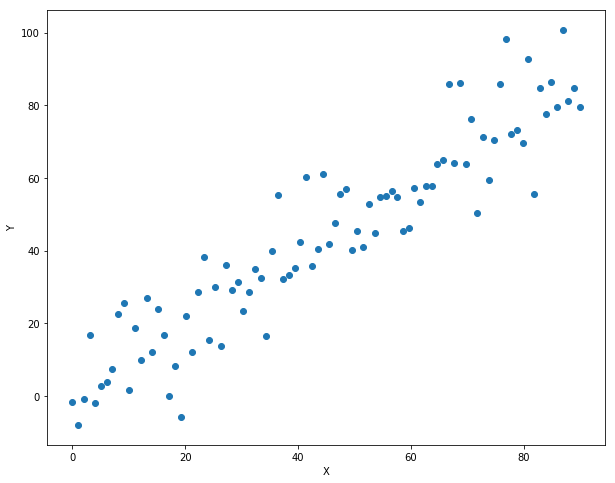

In [38]:
import matplotlib.pyplot as plt #导入画图的程序包
plt.figure(figsize=(10,8)) #设定绘制窗口大小为10*8 inch
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o') #绘制数据，考虑到x和y都是Variable，需要用data获取它们包裹的Tensor，并专成numpy
plt.xlabel('X') #添加X轴的标注
plt.ylabel('Y') #添加Y周的标注
plt.show() #将图形画在下面

In [39]:
a = Variable(torch.rand(1), requires_grad = True) 
b = Variable(torch.rand(1), requires_grad = True)

In [40]:
learning_rate = 0.0001

In [41]:
for i in range(1000):
    predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)  #计算在当前a、b条件下的模型预测数值
    loss = torch.mean((predictions - y_train) ** 2) #通过与标签数据y比较，计算误差
    print('loss:', loss)
    loss.backward() #对损失函数进行梯度反传
    a.data.add_(- learning_rate * a.grad.data)  #利用上一步计算中得到的a的梯度信息更新a中的data数值
    b.data.add_(- learning_rate * b.grad.data)  #利用上一步计算中得到的b的梯度信息更新b中的data数值
    ### 增加了这部分代码，清空存储在变量a，b中的梯度信息，以免在backward的过程中会反复不停地累加
    a.grad.data.zero_() #清空a的梯度数值
    b.grad.data.zero_() #清空b的梯度数值

loss: Variable containing:
 110.2975
[torch.FloatTensor of size 1]

loss: Variable containing:
 99.0728
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.7179
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.2239
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.1202
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0985
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0939
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0929
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0927
[torch.FloatTensor of siz

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size 1]

loss: Variable containing:
 96.0926
[torch.FloatTensor of size

ValueError: x and y must have same first dimension, but have shapes (90,) and (100,)

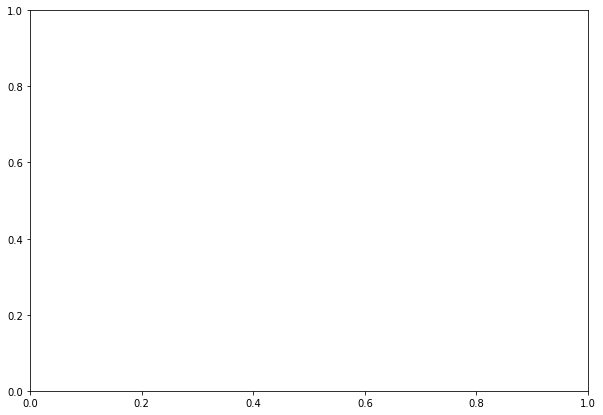

In [42]:
import matplotlib.pyplot as plt #导入画图的程序包 

x_data = x_train.data.numpy()  #将x中的数据转化成NumPy数组
plt.figure(figsize = (10, 7))    #定义绘图窗口
xplot, = plt.plot(x_data, y.data.numpy(), 'o')      #绘制xy散点图
yplot, = plt.plot(x_data, a.data.numpy() * x_data +b.data.numpy())     #绘制拟合直线图
plt.xlabel('X')      #给横坐标轴加标注
plt.ylabel('Y')      #给纵坐标轴加标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])      #将拟合直线的参数a、b显示出来
plt.legend([xplot, yplot],['Data', str1])      #绘制图例
plt.show() #将图形画出来

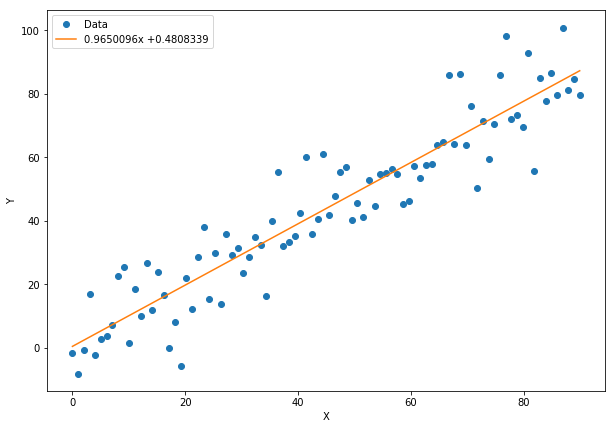

In [44]:
import matplotlib.pyplot as plt #导入画图的程序包 

x_data = x_train.data.numpy()  #将x中的数据转化成NumPy数组
plt.figure(figsize = (10, 7))    #定义绘图窗口
xplot, = plt.plot(x_data, y_train.data.numpy(), 'o')      #绘制xy散点图
yplot, = plt.plot(x_data, a.data.numpy() * x_data +b.data.numpy())     #绘制拟合直线图
plt.xlabel('X')      #给横坐标轴加标注
plt.ylabel('Y')      #给纵坐标轴加标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])      #将拟合直线的参数a、b显示出来
plt.legend([xplot, yplot],['Data', str1])      #绘制图例
plt.show() #将图形画出来

In [45]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test) #计算模型的预测结果
predictions #输出

Variable containing:
 88.2090
 89.1837
 90.1585
 91.1333
 92.1080
 93.0828
 94.0575
 95.0323
 96.0070
 96.9818
[torch.FloatTensor of size 10]

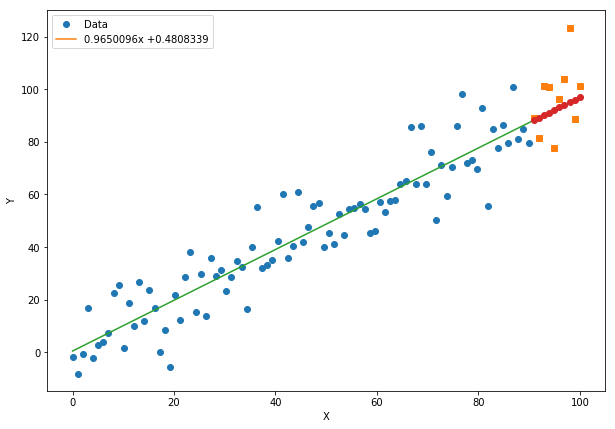

In [46]:
x_data = x_train.data.numpy() # 获得x包裹的数据
x_pred = x_test.data.numpy() # 获得包裹的测试数据的自变量
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
plt.plot(x_data, y_train.data.numpy(), 'o') # 绘制训练数据
plt.plot(x_pred, y_test.data.numpy(), 's') # 绘制测试数据
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())  #绘制拟合数据
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy(), 'o') #绘制预测数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0]) #图例信息
plt.legend([xplot, yplot],['Data', str1]) #绘制图例
plt.show()